In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [4]:
# 데이터 로드
(train_input,train_target),(test_input,test_target) =  tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# 표준화
train_input_scaled = train_input / 255.0
# reshape
train_input_scaled_reshaped = train_input_scaled.reshape(-1,28,28,1)
# train_test_split

x_train,x_test,y_train,y_test =  train_test_split(train_input_scaled_reshaped,train_target,test_size=0.2,random_state=0)
# CNN 모델 구성
# C-M-C-M-F-D-DR-D
model = tf.keras.Sequential([
    Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
    MaxPool2D(2),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(100,activation = 'relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')
]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy,metrics='acc')

In [10]:
from keras import callbacks
checkPoint_cb = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/best-cnn-fashion-mnist.h5',
                                                   save_best_only=True)
earlyStopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.fit(x_train,y_train,epochs=100,batch_size=50,callbacks=[checkPoint_cb,earlyStopping_cb],validation_data=(x_test,y_test))

Epoch 1/100
960/960 [==============================] - 15s 4ms/step - loss: 0.5576 - acc: 0.7951 - val_loss: 0.3922 - val_acc: 0.8561
Epoch 2/100
960/960 [==============================] - 4s 4ms/step - loss: 0.3764 - acc: 0.8619 - val_loss: 0.3444 - val_acc: 0.8724
Epoch 3/100
960/960 [==============================] - 4s 5ms/step - loss: 0.3257 - acc: 0.8796 - val_loss: 0.3023 - val_acc: 0.8891
Epoch 4/100
960/960 [==============================] - 4s 4ms/step - loss: 0.2922 - acc: 0.8920 - val_loss: 0.2907 - val_acc: 0.8966
Epoch 5/100
960/960 [==============================] - 4s 4ms/step - loss: 0.2662 - acc: 0.9010 - val_loss: 0.2720 - val_acc: 0.9024
Epoch 6/100
960/960 [==============================] - 5s 5ms/step - loss: 0.2447 - acc: 0.9094 - val_loss: 0.2788 - val_acc: 0.8980
Epoch 7/100
960/960 [==============================] - 4s 4ms/step - loss: 0.2299 - acc: 0.9152 - val_loss: 0.2540 - val_acc: 0.9085
Epoch 8/100
960/960 [==============================] - 4s 4ms/step -

In [11]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/best-cnn-fashion-mnist.h5')

In [17]:
model.layers[0].weights[0].shape, model.layers[0].weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [18]:
conv_weight = model.layers[0].weights[0]

In [21]:
conv_weight = conv_weight.numpy()

In [23]:
conv_weight.shape

(3, 3, 1, 32)

In [24]:
import matplotlib.pyplot as plt

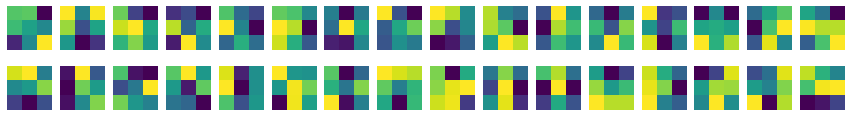

In [33]:
plt.figure(figsize=(15,2))
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(conv_weight[:,:,0,i])
  plt.axis('off')
plt.show()  